In [1]:
import os
import torch
import h5py
import sys
import json
import matplotlib.pyplot as plt
import numpy as np

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
parent_dir = os.path.dirname(os.getcwd())

In [2]:
# Parameters
ps = [1,2,4,8,16,20,24,28,32]
ks = [i for i in range(3, 11)]
ns = [i for i in range(12, 20)]
num_proc = 50
batch_size = 50

In [3]:
# Read in psucc
dir = f"{parent_dir}/experiments/knaesat_eval/reproduce/results"
with open(f'{dir}/psuccs.json', 'r') as f:
    psuccs = json.load(f)

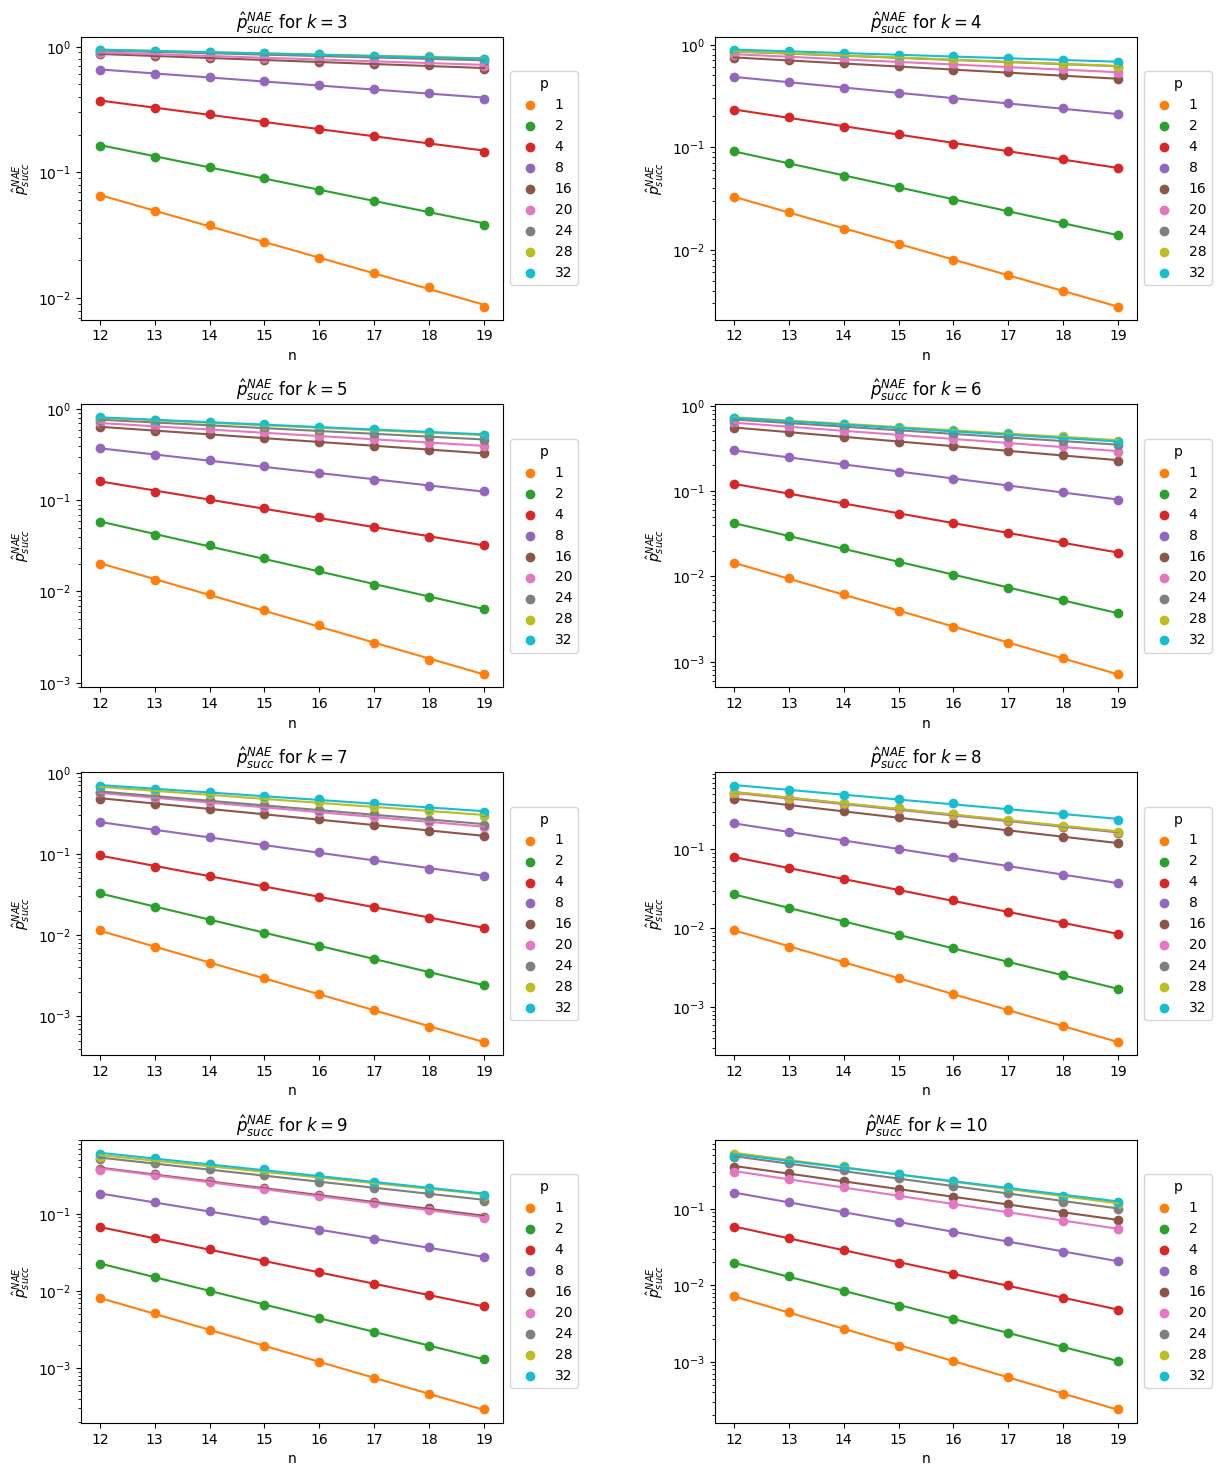

In [150]:
# Plot
ks = [i for i in range(3,11)]
colormap = plt.cm.get_cmap('tab10')
colors = [colormap(i+1) for i in range(len(ps))]
fig, axs = plt.subplots(len(ks) // 2, 2, figsize=(15, 18))
plt.subplots_adjust(hspace=0.3)
for (ax, k) in zip(axs.flatten(), ks):
	psucck = [[psuccs[str(k)][str(n)][str(p)] for n in ns] for p in ps]

	for (p, psucc, color) in zip(ps, psucck, colors):

		# Points
		ax.scatter(ns, psucc, label=p, color=color)

		# Line of best fit
		coefficients = np.polyfit(ns, np.log2(psucc), 1)
		polynomial = np.poly1d(coefficients)
		ax.plot(ns, 2**(polynomial(ns)), color=color)

	ax.set_yscale('log')
	ax.set_xlabel('n')
	ax.set_ylabel('$\hat{p}^{NAE}_{succ}$')
	# Shrink current axis by 20%
	box = ax.get_position()
	ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
	ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='p')
	ax.set_title('$\hat{p}^{NAE}_{succ}$'+ f' for $k = {k}$')


<Figure size 1500x1000 with 0 Axes>

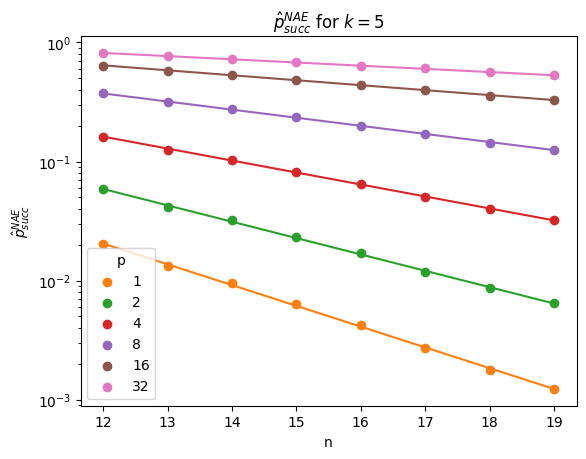

<Figure size 1500x1000 with 0 Axes>

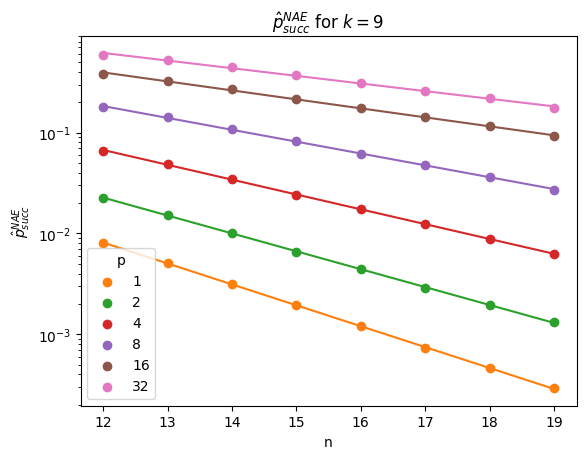

In [5]:
# Plots particularly for k=5,9, p=2^q

ps = [2 **i for i in range(0, 6)]
colormap = plt.cm.get_cmap('tab10')
colors = [colormap(i+1) for i in range(len(ps))]

for k in [5,9]:
    plt.figure(figsize=(15, 10))
    fig, ax = plt.subplots()
    psucck = [[psuccs[str(k)][str(n)][str(p)] for n in ns] for p in ps]
    
    for (p, psucc, color) in zip(ps, psucck, colors):
        # Points
        ax.scatter(ns, psucc, label=p, color=color)

        # Line of best fit
        coefficients = np.polyfit(x=ns, y=np.log2(psucc), deg=1)
        polynomial = np.poly1d(coefficients)
        ax.plot(ns, np.exp2(polynomial(ns)), color=color)

    ax.set_yscale('log')
    ax.set_xlabel('n')
    ax.set_ylabel('$\hat{p}^{NAE}_{succ}$')
    ax.legend(title='p')
    ax.set_title('$\hat{p}^{NAE}_{succ}$' + f' for $k = {k}$')

In [6]:
# Read in mrt
dir = f"{parent_dir}/experiments/knaesat_eval/reproduce/results"
with open(f'{dir}/mrts.json', 'r') as f:
    mrts = json.load(f)

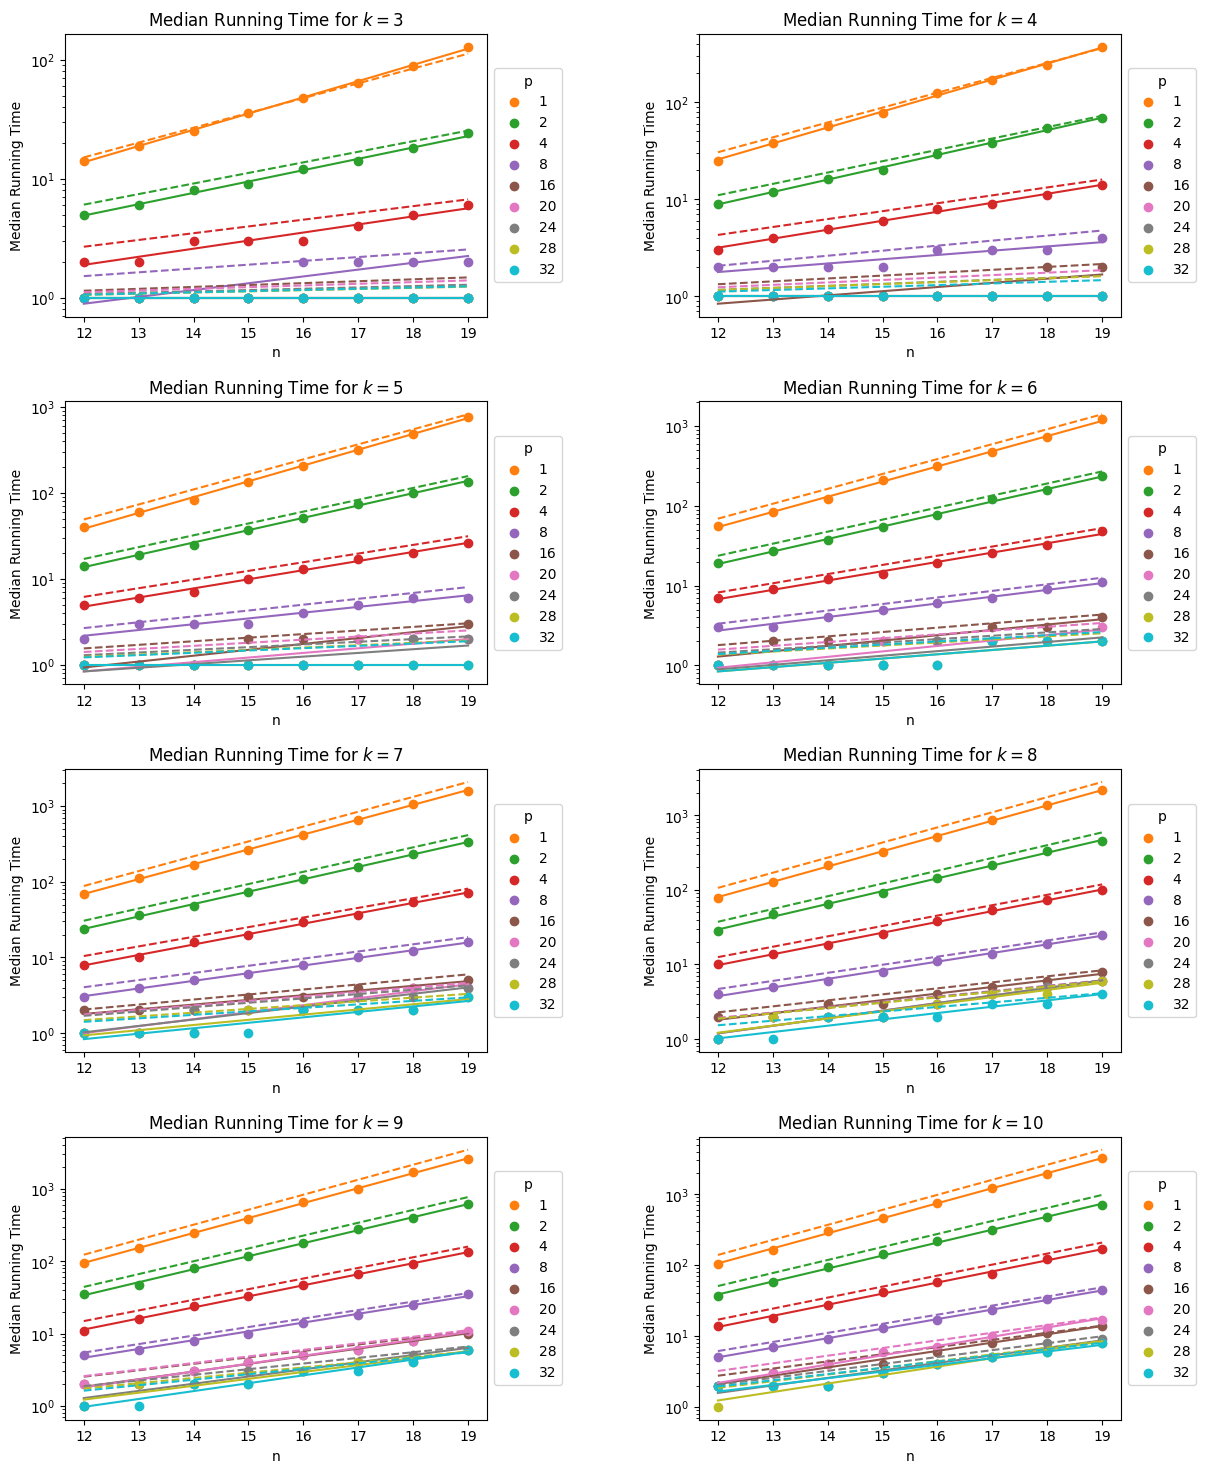

In [151]:
# Plot
ps = [1,2,4,8,16,20,24,28,32]
colormap = plt.cm.get_cmap('tab10')
colors = [colormap(i+1) for i in range(len(ps))]
fig, axs = plt.subplots(len(ks) // 2, 2, figsize=(15, 18))
plt.subplots_adjust(hspace=0.3)
for (ax, k) in zip(axs.flatten(), ks):
	mrtk = [[mrts[str(k)][str(n)][str(p)] for n in ns] for p in ps]
	psucck = [[psuccs[str(k)][str(n)][str(p)] for n in ns] for p in ps]

	for (p, mrt, psucc, color) in zip(ps, mrtk, psucck, colors):

		# Points
		ax.scatter(ns, mrt, label=p, color=color)

		# Line of best fit
		coefficients = np.polyfit(ns, np.log2(mrt), 1)
		polynomial = np.poly1d(coefficients)
		ax.plot(ns, 2**(polynomial(ns)), color=color)

		#psucc
		coefficients = np.polyfit(ns, np.log2(psucc), 1)
		polynomial = np.poly1d(-1 * coefficients)
		ax.plot(ns, 2**(polynomial(ns)), color=color, linestyle='dashed')

	ax.set_yscale('log')
	ax.set_xlabel('n')
	ax.set_ylabel('Median Running Time')
	# Shrink current axis by 20%
	box = ax.get_position()
	ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
	ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='p')
	ax.set_title('Median Running Time'+ f' for $k = {k}$')

<Figure size 1500x1000 with 0 Axes>

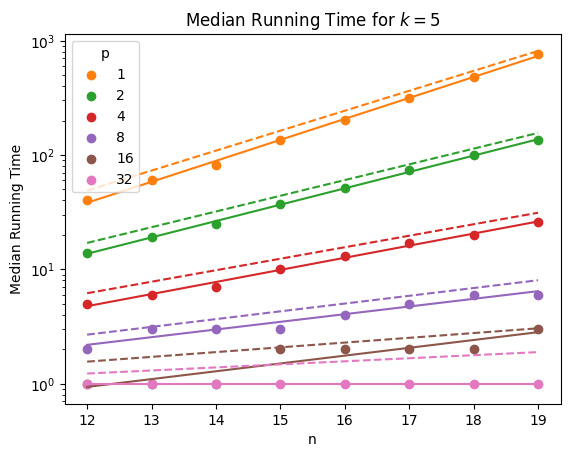

<Figure size 1500x1000 with 0 Axes>

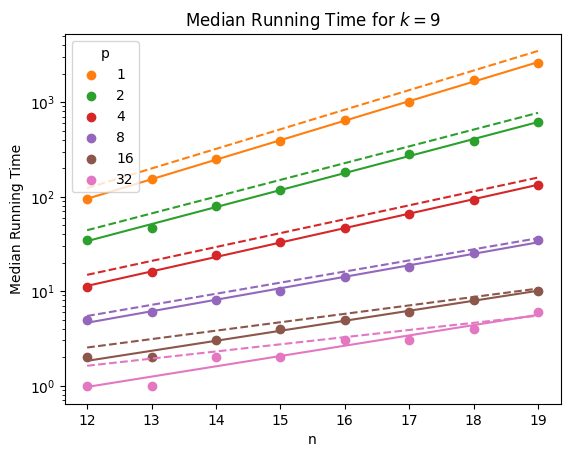

In [8]:
# Plots particularly for k=5,9, p=2^q

ps = [2 **i for i in range(0, 6)]
colormap = plt.cm.get_cmap('tab10')
colors = [colormap(i+1) for i in range(len(ps))]

for k in [5,9]:
    plt.figure(figsize=(15, 10))
    fig, ax = plt.subplots()
    mrtk = [[mrts[str(k)][str(n)][str(p)] for n in ns] for p in ps]
    psucck = [[psuccs[str(k)][str(n)][str(p)] for n in ns] for p in ps]

    for (p, mrt, psucc, color) in zip(ps, mrtk, psucck, colors):

        # Points
        ax.scatter(ns, mrt, label=p, color=color)

        # Line of best fit
        coefficients = np.polyfit(ns, np.log2(mrt), 1)
        polynomial = np.poly1d(coefficients)
        ax.plot(ns, 2**(polynomial(ns)), color=color)

        #psucc
        coefficients = np.polyfit(ns, np.log2(psucc), 1)
        polynomial = np.poly1d(-1 * coefficients)
        ax.plot(ns, 2**(polynomial(ns)), color=color, linestyle='dashed')

    ax.set_yscale('log')
    ax.set_xlabel('n')
    ax.set_ylabel('Median Running Time')
    ax.legend(title='p')
    ax.set_title('Median Running Time'+ f' for $k = {k}$')

Coefficients

In [9]:
ps = [1,2,4,8,16,20,24,28,32]
# Calculate coeffs
psucc_coeffs = {k : {p : {} for p in ps} for k in ks}
mrt_coeffs = {k : {p : {} for p in ps} for k in ks}

for k in ks:
	mrtk = [[mrts[str(k)][str(n)][str(p)] for n in ns] for p in ps]
	psucck = [[psuccs[str(k)][str(n)][str(p)] for n in ns] for p in ps]
	for (p, mrtk, psucc) in zip(ps, mrtk, psucck):
		# mrt
		coefficients = np.polyfit(ns, np.log2(mrtk), 1)
		mrt_coeffs[k][p]['c'] = list(coefficients)
		#psucc
		coefficients = np.polyfit(ns, np.log2(psucc), 1)
		psucc_coeffs[k][p]['c'] = list(coefficients)

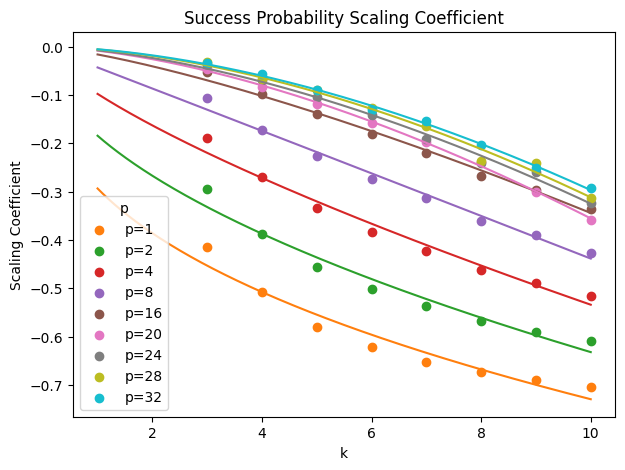

In [10]:
from scipy.optimize import curve_fit
# Plot psucc coefficients as a function of p
ps = [1,2,4,8,16,20,24,28,32]
fig, ax = plt.subplots(figsize=(7, 5))
colormap = plt.cm.get_cmap('tab10')
colors = [colormap(i+1) for i in range(len(ps))]
for (p, color) in zip(ps, colors):
    coefficients = [psucc_coeffs[k][p]['c'][0] for k in ks]
    ax.scatter(ks, coefficients, label=f"p={p}", color=color)
    #ax.plot(ks, coefficients)
    # Power fit
    def scaling(x, a, b):
        return a * np.power(x, b)
    params, _ = curve_fit(scaling, ks, coefficients)
    x_fit = np.linspace(1, max(ks), 1000)
    y_fit = scaling(x_fit, params[0], params[1])
    ax.plot(x_fit, y_fit, color=color)
ax.set_xlabel("k")
ax.set_ylabel("Scaling Coefficient")
ax.legend(title="p")
ax.set_title("Success Probability Scaling Coefficient")
plt.show()

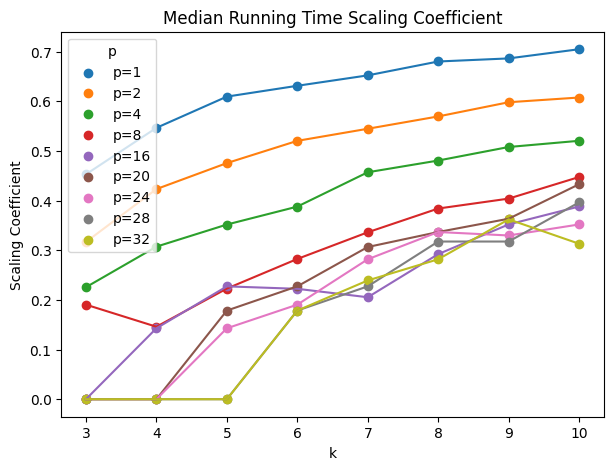

In [11]:
# Plot mrt coefficients as a function of p
ps = [1,2,4,8,16,20,24,28,32]
fig, ax = plt.subplots(figsize=(7, 5))
for p in ps:
    coefficients = [mrt_coeffs[k][p]['c'][0] for k in ks]
    ax.scatter(ks, coefficients, label=f"p={p}")
    ax.plot(ks, coefficients)
ax.set_xlabel("k")
ax.set_ylabel("Scaling Coefficient")
ax.legend(title="p")
ax.set_title("Median Running Time Scaling Coefficient")
plt.show()

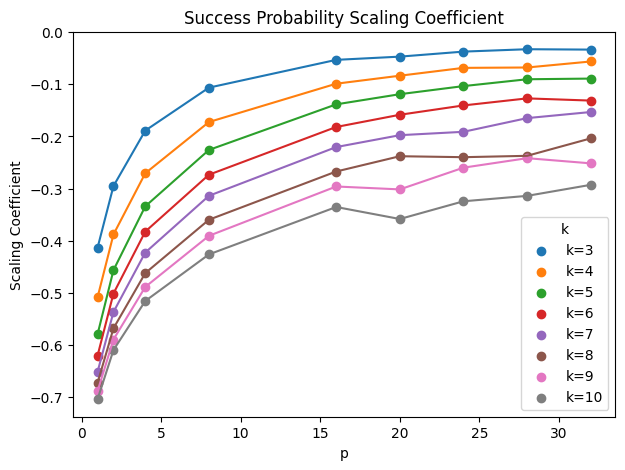

In [12]:
# Plot psucc coefficients as a function of k
ps = [1,2,4,8,16,20,24,28,32]
fig, ax = plt.subplots(figsize=(7, 5))
for k in ks:
    coefficients = [psucc_coeffs[k][p]['c'][0] for p in ps]
    ax.scatter(ps, coefficients, label=f"k={k}")
    ax.plot(ps, coefficients)
ax.set_xlabel("p")
ax.set_ylabel("Scaling Coefficient")
ax.legend(title="k")
ax.set_title("Success Probability Scaling Coefficient")
plt.show()

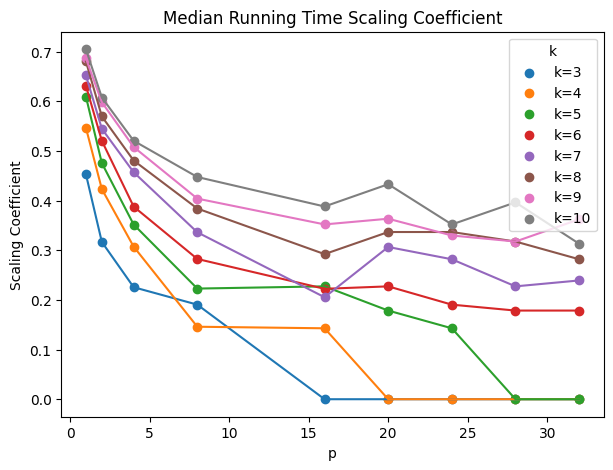

In [13]:
# Plot mrt coefficients as a function of k
ps = [1,2,4,8,16,20,24,28,32]
fig, ax = plt.subplots(figsize=(7, 5))
for k in ks:
    coefficients = [mrt_coeffs[k][p]['c'][0] for p in ps]
    ax.scatter(ps, coefficients, label=f"k={k}")
    ax.plot(ps, coefficients)
ax.set_xlabel("p")
ax.set_ylabel("Scaling Coefficient")
ax.legend(title="k")
ax.set_title("Median Running Time Scaling Coefficient")
plt.show()

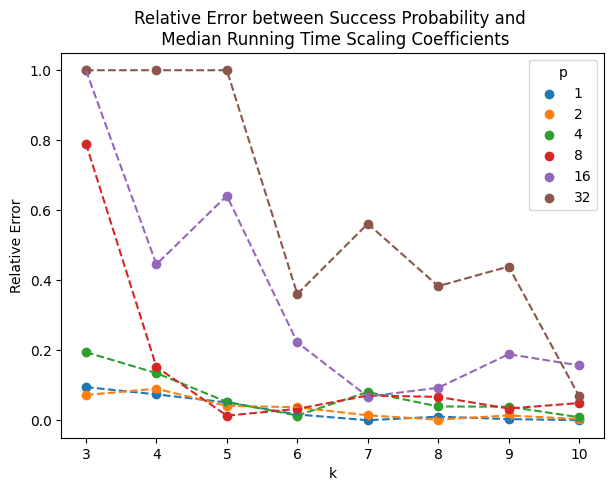

In [14]:
# Plot relative difference as a function of k
ps=[1,2,4,8,16,32]
fig, ax = plt.subplots(figsize=(7, 5))
for p in ps:
    errors = [abs((mrt_coeffs[k][p]['c'][0] + psucc_coeffs[k][p]['c'][0])/psucc_coeffs[k][p]['c'][0]) for k in ks]
    ax.scatter(ks, errors, label=f"{p}")
    ax.plot(ks,errors, linestyle='--')
    coefficients = np.polyfit(ks, errors, 1)
    polynomial = np.poly1d(coefficients)
    #ax.plot(ks, polynomial(ks))

ax.set_xlabel("k")
ax.set_ylabel("Relative Error")
ax.legend(title="p")
ax.set_title("Relative Error between Success Probability and \n Median Running Time Scaling Coefficients")
plt.show()

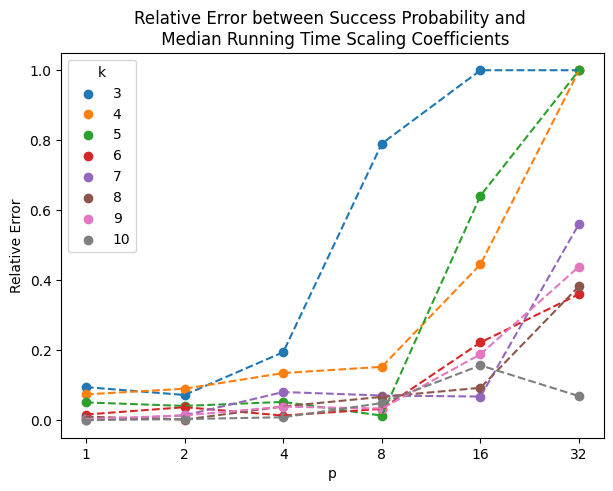

In [15]:
# Plot relative difference as a function of k
from matplotlib.ticker import ScalarFormatter, StrMethodFormatter
ps=[1,2,4,8,16,32]
fig, ax = plt.subplots(figsize=(7, 5))
for k in ks:
    errors = [abs((mrt_coeffs[k][p]['c'][0] + psucc_coeffs[k][p]['c'][0])/psucc_coeffs[k][p]['c'][0]) for p in ps]
    ax.scatter(ps, errors, label=f"{k}")
    ax.plot(ps, errors, linestyle='--')

ax.set_xlabel("p")
ax.set_xscale('log', base=2)
formatter = StrMethodFormatter("{x:.0f}")
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel("Relative Error")
ax.legend(title="k")
ax.set_title("Relative Error between Success Probability and \n Median Running Time Scaling Coefficients")
plt.show()

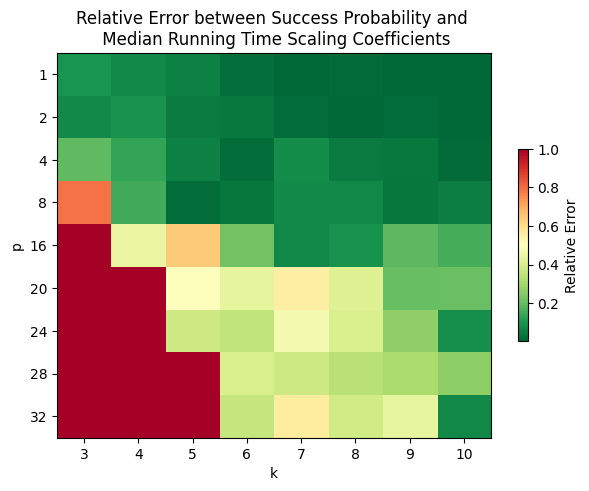

In [16]:
import matplotlib.pyplot as plt
import numpy as np

ps = [1, 2, 4, 8, 16, 20, 24, 28, 32]

errors = np.zeros((len(ps), len(ks)))
for i, p in enumerate(ps):
    for j, k in enumerate(ks):
        error = abs((mrt_coeffs[k][p]['c'][0] + psucc_coeffs[k][p]['c'][0]) / psucc_coeffs[k][p]['c'][0])
        errors[i, j] = error

fig, ax = plt.subplots(figsize=(7, 5))
im = ax.imshow(errors, cmap='RdYlGn_r', aspect='auto')

ax.set_xticks(np.arange(len(ks)))
ax.set_yticks(np.arange(len(ps)))
ax.set_xticklabels(ks)
ax.set_yticklabels(ps)
ax.set_xlabel('k')
ax.set_ylabel('p')

# Add colorbar
cbar = fig.colorbar(im, shrink=0.5)
cbar.set_label('Relative Error')

plt.title('Relative Error between Success Probability and \n Median Running Time Scaling Coefficients')
plt.show()

Next, we benchmark against `WalkSATlm`

In [17]:
# Parameters
num_proc = 200
batch_size = 10
ks = [i for i in range(3, 10)]
ns = [i for i in range(12, 20)]
tbs = ['lm', 'm2b2']

In [42]:
# Extract
dir = f'{parent_dir}/experiments/knaesat_benchmark/reproduce/'
rts = {k : {n : {tb : torch.zeros(size=(num_proc * batch_size, )) for tb in tbs} for n in ns} for k in ks}
count = 0
for k in ks:
	for n in ns:
		for tb in tbs:
			prev = None
			for proc in range(num_proc):
				filename = f'{dir}/rt_{n}_{k}_{tb}_{proc * batch_size}.hdf5' 
				try:
					with h5py.File(filename, 'r') as file:
						fresh = torch.from_numpy(file.get('times')[:])
						index = proc * batch_size
						rts[k][n][tb][index : index + batch_size] = fresh
						prev = fresh
						count += 1
				except:
					if prev is not None:
						rts[k][n][tb][index : index + batch_size] = prev

					
ws_mrts = {k : {n : {tb : torch.median(torch.masked_select(rts[k][n][tb], rts[k][n][tb] >0)) for tb in tbs} for n in ns} for k in ks}

In [70]:
ws_mrts_dump = {k : {n : {tb : ws_mrts[k][n][tb].numpy().tolist() for tb in tbs} for n in ns} for k in ks}
with open('ws_mrts.json', 'w') as f:
    json.dump(ws_mrts_dump, f)

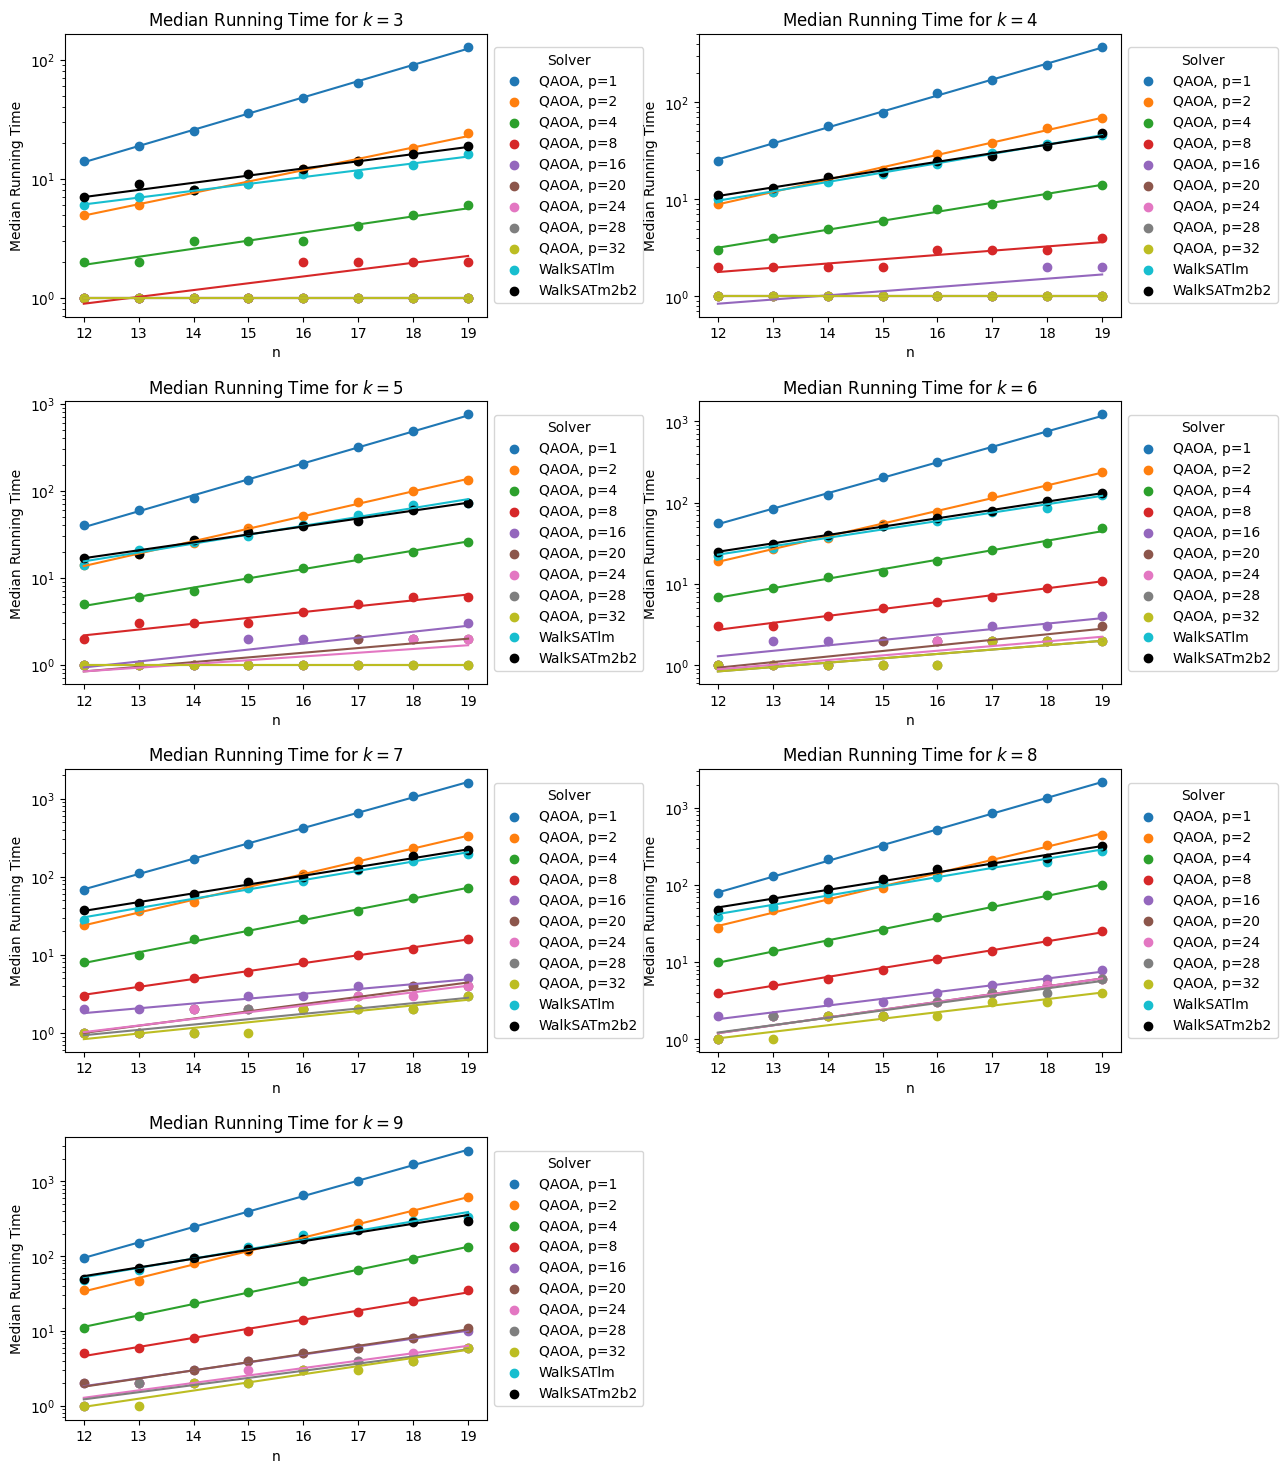

In [149]:
ps = [1,2,4,8,16,20,24,28,32]
colormap = plt.cm.get_cmap('tab10')
colors = [colormap(i) for i in range(len(ps)+2)]
fig, axs = plt.subplots(len(ks) // 2 + 1, 2, figsize=(15, 18))
fig.delaxes(axs[len(ks)// 2, 1])
plt.subplots_adjust(hspace=0.3)
for (ax, k) in zip(axs.flatten(), ks):
	# QAOA
	mrtk = [[mrts[str(k)][str(n)][str(p)] for n in ns] for p in ps]
	for (p, mrt, colour) in zip(ps, mrtk, colors):
		ax.scatter(ns, mrt, label=f'QAOA, p={p}', color=colour)
		coefficients = np.polyfit(ns, np.log2(mrt), 1)
		polynomial = np.poly1d(coefficients)
		ax.plot(ns, 2 ** polynomial(ns), color=colour)

	# WalkSATlm
	colour = colors[len(ps)]
	ws_mrtk = [ws_mrts[k][n]['lm'] for n in ns]
	ax.scatter(ns, ws_mrtk, label='WalkSATlm', color=colour)
	coefficients = np.polyfit(ns, np.log2(ws_mrtk), 1)
	polynomial = np.poly1d(coefficients)
	ax.plot(ns, 2 ** polynomial(ns), color=colour)

	# WalkSATm2b2
	colour = "black"
	ws_mrtk = [ws_mrts[k][n]['m2b2'] for n in ns]
	ax.scatter(ns, ws_mrtk, label='WalkSATm2b2', color=colour)
	coefficients = np.polyfit(ns, np.log2(ws_mrtk), 1)
	polynomial = np.poly1d(coefficients)
	ax.plot(ns, 2 ** polynomial(ns), color=colour)

	ax.set_yscale('log')
	ax.set_xlabel('n')
	ax.set_ylabel('Median Running Time')
	# Shrink current axis by 20%
	box = ax.get_position()
	ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
	# Put a legend to the right of the current axis
	ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Solver')
	ax.set_title('Median Running Time'+ f' for $k = {k}$')

In [57]:
# Collect WalkSAT coeffs
for k in ks:
	for tb in tbs:
		mrt_coeffs[k][tb] = {}
		ws_mrtk = [ws_mrts[k][n][tb] for n in ns]
		coefficients = np.polyfit(ns, np.log2(ws_mrtk), 1)
		mrt_coeffs[k][tb]['c'] = list(coefficients)

[ 0.48193188 -0.73653218]
[ 0.59220998 -0.68702534]
[ 0.64106651 -0.51678505]
[ 0.64427816 -0.37302963]
[ 0.66099965 -0.30455395]
[ 0.67472907 -0.24718223]
[ 0.68581328 -0.22158058]
[ 0.6987176  -0.19971659]


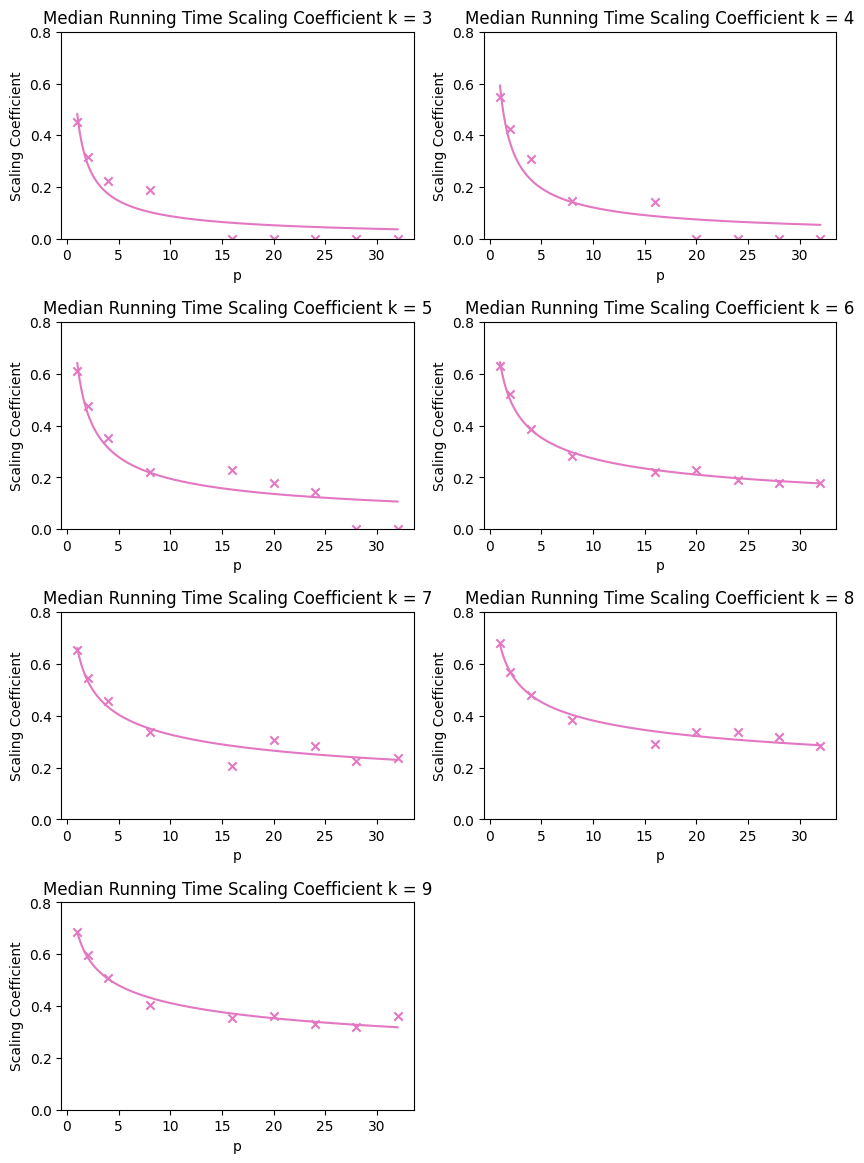

In [165]:
from scipy.optimize import curve_fit
from benchmark.cnf.ratios import nae_sat_ratios
ps = [1,2,4,8,16,20,24,28,32]
colourmap = plt.cm.get_cmap('tab10')
colours = [colourmap(i) for i in range(len(ks))]
fig, axs = plt.subplots(len(ks) // 2, 2, figsize=(10, 14))
fig.delaxes(axs[len(ks)// 2 - 1, 1])
plt.subplots_adjust(hspace=0.4)
for (ax, k) in zip(axs.flatten(), ks):
    # Plot coeffs
    coefficients = [mrt_coeffs[k][p]['c'][0] for p in ps]
    ax.scatter(ps, coefficients, color=colours[i],marker='x')

    # Power fit
    def scaling(x, a, b):
        return a * np.power(x, b)
    params, _ = curve_fit(scaling, ps, coefficients)
    print(params)
    x_fit = np.linspace(1, max(ps), 1000)
    y_fit = scaling(x_fit, params[0], params[1])
    ax.plot(x_fit, y_fit, color=colours[i])
    #ax.axhline(y=mrt_coeffs[k]['m2b2']['c'][0], linestyle='--', color=colours[i])
    #ax.axhline(y=2**(1-k) * nae_sat_ratios[k], linestyle='dotted', color=colours[i])

    ax.set_xlabel("p")
    ax.set_ylabel("Scaling Coefficient")
    ax.set_ylim([0,0.8])
    ax.set_title(f"Median Running Time Scaling Coefficient k = {k}")